In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/Algerian_forest_fires_dataset_UPDATEDD.csv")

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
df[["RH","Ws"]] = df[["RH","Ws"]].astype(int)

In [ ]:
df.drop(["day", "month", "year"], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder

In [ ]:
X=df.drop("Classes",axis=1)

y=df["Classes"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
s=StandardScaler()

In [ ]:
X_train_scaled=s.fit_transform(X_train)
X_test=s.transform(X_test)

<Axes: >

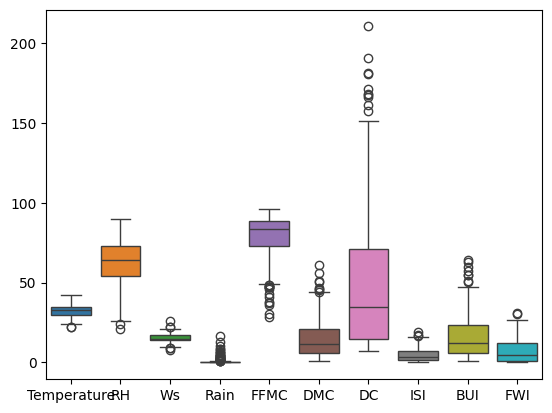

In [ ]:
sns.boxplot(X_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
parameter={"criterion":["gini", "entropy", "log_loss"],
           "max_depth":[1,2,3,4,5,6],
           "max_leaf_nodes":[1,2,3,4,5,6]}+

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
gsv=GridSearchCV(rf,parameter,scoring="accuracy",cv=5)

In [ ]:
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6]},
             scoring='accuracy')

In [ ]:
y_pred=gsv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(accuracy_score(y_test,y_pred))

0.40816326530612246


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  2  0  0]
 [ 0  0 25  0  0]
 [ 0  0 20  0  0]
 [ 0  0  1  0  0]
 [ 0  0  1  0  0]]


In [ ]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

         fire       0.00      0.00      0.00         2
      fire          0.00      0.00      0.00        25
  not fire          0.41      1.00      0.58        20
 not fire           0.00      0.00      0.00         1
not fire            0.00      0.00      0.00         1

     accuracy                           0.41        49
    macro avg       0.08      0.20      0.12        49
 weighted avg       0.17      0.41      0.24        49

